# Аналитика в авиакомпании
**Описание проекта**
Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

**Исходные данные:**
1. Собственные данные компании о рейсах совершенных в 2018г.
Результаты вывода по SQL запросам:
/datasets/query_1.csv, /datasets/query_3.csv, /datasets/query_last.csv
2. Информация о крупнейших фестивалях с сайта:
 https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

**Инструкция по выполнению проекта**

Проект состоит из двух частей: тренажёр и Jupyter Notebook для отправки на проверку. Шаги 1, 2 и 3 выполните в тренажёре, а шаги 4 и 5 — в Jupyter Notebook.

**Шаг 1. Напишите парсер для сбора с сайта данных о 10 крупнейших фестивалях 2018 года**
Ссылка на сайт: https://code.s3.yandex.net/learning-materials/data-analyst/festival_news/index.html

**Шаг 2. Исследовательский анализ данных**
Посчитайте, на самолётах какой модели было совершено больше всего рейсов в сентябре 2018 года. Назовите получившееся поле flights_amount и выведите его , также выведите поле model.
Посчитайте количество рейсов по всем моделям самолетов Boeing и Airbus в сентябре. Назовите получившуюся переменную flights_amount и выведите ее.
Посчитайте среднее количество прибывающих рейсов в день для каждого города за август 2018 года. Назовите получившееся поле average_flights , вместе с ней выведите столбец city.

**Шаг 3. Проверьте гипотезу, что количество рейсов во время фестивалей увеличивается**
Установите фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили. Выведите название фестиваля festival_name и номер недели festival_week.
Для каждой недели с 23 июля по 30 сентября 2018 года посчитайте количество билетов, купленных на рейсы в Москву (номер недели week_number и количество рейсов flights_amount). Получите таблицу, в которой будет информация о количестве купленных за неделю билетов, отметка, проходил ли в эту неделю фестиваль, название фестиваля festival_name и номер недели week_number.

**Шаг 4. Аналитика средствами Python**
У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.
/datasets/query_1.csv — результат первого запроса. В нём содержится информация о:
model — модели самолета
flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года

/datasets/query_3.csv — результат третьего запроса. В нём содержится информация о:
city — городах
average_flights — среднем количестве рейсов, прибывающих в город city за день в сентябре 2018 года

Для этих двух наборов данных нужно:
импортировать файлы;
изучить данные в них;
проверить типы данных на корректность;
выбрать топ-10 городов по количеству рейсов;
построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
сделать выводы по каждому из графиков, пояснить результат.

**Шаг 5. Проверка гипотезы средствами Python**
/datasets/query_last.csv — результат последнего запроса. В нём следующая информация:
week_number — номер недели;
ticket_amount — количество проданных билетов за неделю;
festival_week — есть ли на этой неделе фестиваль;
festival_name — название фестиваля.
Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».
Пороговое значение alpha задайте самостоятельно.
Поясните:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

## Шаг 4. Аналитика средствами Python

In [1]:
# загрузка необходимых библиотек 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st 

# настройка окружения
pd.options.display.max_columns = None
pd.options.display.float_format= '{:.2f}'.format
sns.set()

In [2]:
# загрузка результатов SQL запросов к БД компании в датафреймы:
df_flights = pd.read_csv('/datasets/query_1.csv')
df_city = pd.read_csv('/datasets/query_3.csv')

In [3]:
display(df_flights)
df_flights.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [4]:
display(df_city.head())
df_city.info()

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Типы данных в обоих таблицах записаны корректно: int64 для количества перелетов, float для среднего числа прилетов по городам.

##### Топ-10 городов по количеству рейсов

In [5]:
df_city.sort_values('average_flights', ascending=False).head(10)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


##### График 1. Модели самолетов и количество рейсов.

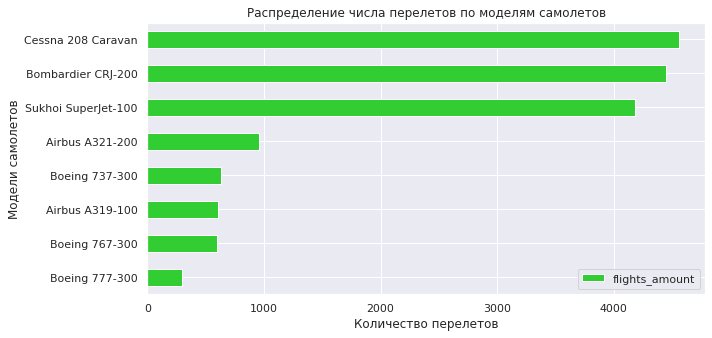

In [6]:
df_flights.sort_values('flights_amount').plot('model', 'flights_amount', kind='barh', figsize=(10, 5), color='limegreen')
plt.ylabel('Модели самолетов')
plt.xlabel('Количество перелетов')
plt.title('Распределение числа перелетов по моделям самолетов');

**Выводы.** Наибольшее число рейсов совершается тремя моделями самолетов:  'Cessna 208 Caravan','Bombardier CRJ-200', 'Sukhoi SuperJet-100'. Характерно уменьшение числа рейсов с ростом вместимости самолета. Модели Boeing и Airbas вместимостью 200-300 человек совершают от 300 до 960 рейсов, малые самолеты Cessna и Bombardier (9-24) пассажира больше 4000 вылетов. Выделяется из общей картины модель 'Sukhoi SuperJet-100' - при вместимости около 100 чел за выбранный период 2018г. совершено 4185 рейсов.

##### График 2. Города и количество рейсов.

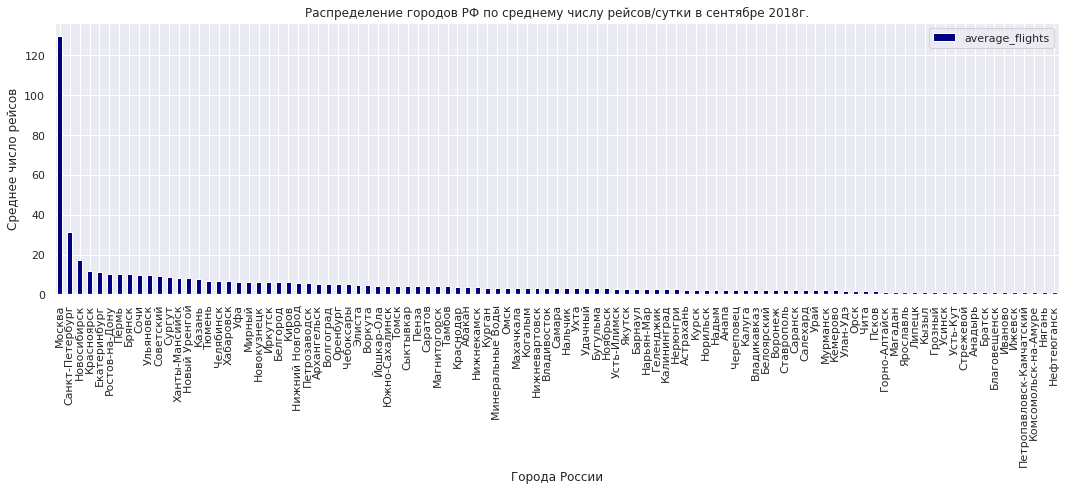

In [7]:
(df_city.sort_values('average_flights', ascending=False)
     .plot('city', 'average_flights', kind='bar', figsize=(18, 5), color='navy'))
plt.xlabel('Города России')
plt.ylabel('Среднее число рейсов')
plt.title('Распределение городов РФ по среднему числу рейсов/сутки в сентябре 2018г.');

**Выводы.** Число перелетов по городам распределено очень неравномерно. Максимальная концентрация рейсов в Москве, первая тройка городов имеет большой отрыв по числу рейсов от остальных. Для оставшихся городов график убывания числа рейсов становится пологим.

##### График 3. Топ-10 городов и количество рейсов.

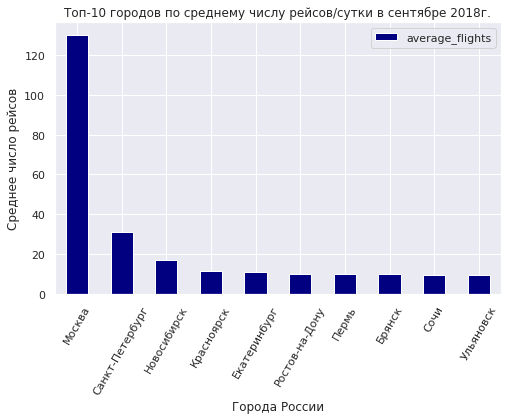

In [8]:
(df_city.sort_values('average_flights', ascending=False).head(10)
     .plot('city', 'average_flights', kind='bar', figsize=(8, 5), color='navy', rot = 60))
plt.xlabel('Города России')
plt.ylabel('Среднее число рейсов')
plt.title('Топ-10 городов по среднему числу рейсов/сутки в сентябре 2018г.');

**Выводы.** Чем крупнее город, тем больше авиарейсов. Для Москвы и Санкт-Петербурга получены ожидаемые значения - 1 и 2 место, Новосибирск неожиданно на 3 месте и с существенным отрывом от 4-го места (17 рейсов против 11). Может быть связано со спецификой работы самой авиакомпании, сезонным фактором и т.д.  

## Шаг 5. Проверка гипотезы средствами Python

**Шаг 5. Проверка гипотезы средствами Python**
Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».
Пороговое значение alpha задайте самостоятельно.
Пояснить:
как вы формулировали нулевую и альтернативную гипотезы;
какой критерий использовали для проверки гипотез и почему.

#####  5.1. Загрузка и проверка данных.

In [9]:
df_flyfest = pd.read_csv('/datasets/query_last.csv')
display(df_flyfest)
df_flyfest.info()

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.00,Park Live
1,31,51034,31.00,Пикник Афиши
2,32,51675,nan,NaN
3,33,51378,nan,NaN
4,34,51492,nan,NaN
5,35,51360,nan,NaN
6,36,51386,36.00,Видфест
7,37,51670,nan,NaN
8,38,51518,nan,NaN
9,39,51623,nan,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
week_number      10 non-null int64
ticket_amount    10 non-null int64
festival_week    3 non-null float64
festival_name    3 non-null object
dtypes: float64(1), int64(2), object(1)
memory usage: 400.0+ bytes


**Вывод:** типы данных в таблице корректны. Можно проводить исследование без дополнительной обработки.

##### 5.2. Проверка гипотезы

**Гипотеза:**
***
**H0:** Средний спрос на билеты во время фестивалей равен среднему спросу на билеты в обычное время;
***
**H1:** Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время.
***
Пороговое значение alpha = 0,05

In [10]:
# Выделяем ряды для проверки гипотезы. 
# s_norm - спрос на билеты в обычное время
# s_fest - спрос на билеты во время фестивалей

In [11]:
# цикл для обработки датафрейма с полетами и фестивалями
# (сделано из соображений тренировки и универсальности, 
# массив маленький, можно обойтись прямым присваиванием значений по индексам и срезами)
s_fest = []
s_norm = []
for index, row in df_flyfest.iterrows():
    if row['festival_week'] == row['week_number']: # проверка совпадения номера недели со временем фестиваля
        s_fest.append(row['ticket_amount'])
    else:    
        s_norm.append(row['ticket_amount'])

# проверка результатов обработки (общее число должно быть 10):
print('Число недель с фестивалями:', len(s_fest))
print('Число обычных недель', len(s_norm))

Число недель с фестивалями: 3
Число обычных недель 7


In [13]:
s_norm

[51675, 51378, 51492, 51360, 51670, 51518, 51623]

Для проверки ряда на соответствие нормальному распределению методом д'Агостино (normaltest) необходимо не менее 8 значений. 
В нашем случае имеем 3 значения в одном ряду и 7 в другом. Следовательно проверка по t-критерию Стюдента для нормального распределения не подходит. **Критерии для проверки рядов с нормальным распределением - неприменимы.**

Для проверки гипотез (для рядов не соотвествующих распределению Гаусса) можно использовать критерий Манна-Уитни, имеющий следующие ограничения:
***
1. В каждой из выборок должно быть не менее 3 значений признака. Допускается, чтобы в одной выборке было два значения, но во второй тогда не менее пяти.
2. В выборочных данных не должно быть совпадающих значений (все числа — разные) или таких совпадений должно быть очень мало (до 10).
***
(источник https://ru.wikipedia.org/wiki/U-%D0%BA%D1%80%D0%B8%D1%82%D0%B5%D1%80%D0%B8%D0%B9_%D0%9C%D0%B0%D0%BD%D0%BD%D0%B0_%E2%80%94_%D0%A3%D0%B8%D1%82%D0%BD%D0%B8)
Выполняются оба требования. **Проверку гипотезы проводм по критерию Манна-Уитни**

In [12]:
# проверка гипотезы по критерию Манна-Уитни
u, p_value = st.mannwhitneyu(s_norm, s_fest)
print('U-критерий Манна — Уитни:', u, ' Уровень значимости критерия:', p_value)

U-критерий Манна — Уитни: 2.0  Уровень значимости критерия: 0.03412374418900064


**Вывод:** Нулевая гипотеза не может быть принята при уровне критерия значимости 5% (фактически получен уровень значимости 3,4%). Следовательно может быть истинна альтернативная гипотеза: "Средний спрос на билеты во время фестивалей отличается от среднего спроса на билеты в обычное время".
**PS** видимо сыграл роль непонятный выброс на 30 неделе, во время фестиваля "Park Live" - 43 тыс. билетов при обычных 51 тыс. Влияние фестиваля, если оно есть, в данном случае отрицательно сказывается на продажах билетов.